<a href="https://colab.research.google.com/github/fluxtransport/glmtools/blob/master/examples/glm_from_gc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load GLM Level 2 data files from Google Cloud
---

In [0]:
# When running glmtools on Google Cloud, it's helpful to have this block of code to install dependencies.
try:
  import glmtools
except:
  !pip install git+https://github.com/fluxtransport/glmtools.git
  import glmtools
try:
  import siphon
except:
  !pip install siphon
try: 
  import netCDF4 as netcdf
except:
  !pip install netCDF4
  import netCDF4 as netcdf
try:
  import cartopy.crs as ccrs
  import cartopy.feature as cfeature
except:
  !apt-get install libproj-dev proj-data proj-bin
  !apt-get install libgeos-dev 
  !pip install cython
  !pip install cartopy
  !pip uninstall shapeley
  !pip install git+https://github.com/Toblerity/Shapely.git
  import cartopy.crs as ccrs
  import cartopy.feature as cfeature
try:
  from lmatools.grid import fixed
except:
  !pip install git+https://github.com/deeplycloudy/lmatools.git
  from lmatools.grid import fixed

Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 32 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 0s (2,292 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 144467 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (

In [0]:
import pandas as pd
import numpy as np
import glob
import os
from glmtools.io.glm import GLMDataset
from glmtools.io.imagery import open_glm_time_series

###Check GOES data listings available on Google Cloud at https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=noaa_goes16


In [0]:
# Copy some data from GC
!gsutil -m cp  gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/* /tmp

Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441610200_e20180441610400_c20180441610419.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441610000_e20180441610200_c20180441610224.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441610400_e20180441611000_c20180441611026.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441611000_e20180441611200_c20180441611216.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441611200_e20180441611400_c20180441611427.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441611400_e20180441612000_c20180441612023.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441612000_e20180441612200_c20180441612223.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/O

In [0]:
fns = np.sort(glob.glob('/tmp/OR_GLM-L2*.nc'))
print(fns[0])

accum_mins = 3
glm = GLMDataset(fns[0])
print(glm)

/tmp/OR_GLM-L2-LCFA_G16_s20180441610000_e20180441610200_c20180441610224.nc


In [0]:
glm.dataset

<xarray.Dataset>
Dimensions:                                 (number_of_events: 2085, number_of_field_of_view_bounds: 2, number_of_flashes: 102, number_of_groups: 1177, number_of_time_bounds: 2, number_of_wavelength_bounds: 2)
Coordinates:
    event_id                                (number_of_events) uint32 143872331 ... 143874537
    event_time_offset                       (number_of_events) datetime64[ns] ...
    event_lat                               (number_of_events) float32 -22.562473 ... -17.293335
    event_lon                               (number_of_events) float32 -46.404686 ... -54.015892
    event_parent_group_id                   (number_of_events) uint32 60159680 ... 60160923
    group_id                                (number_of_groups) uint32 60159680 ... 60160923
    group_time_offset                       (number_of_groups) datetime64[ns] ...
    group_lat                               (number_of_groups) float32 -22.564932 ... -17.217188
    group_lon                               (number_of_groups) float32 -46.34405 ... -54.065018
    group_parent_flash_id                   (number_of_groups) uint16 21630 ... 21786
    flash_id                                (number_of_flashes) uint16 21630 ... 21786
    flash_time_offset_of_first_event        (number_of_flashes) datetime64[ns] ...
    flash_time_offset_of_last_event         (number_of_flashes) datetime64[ns] ...
    flash_lat                               (number_of_flashes) float32 -22.569193 ... -17.219889
    flash_lon                               (number_of_flashes) float32 -46.3687 ... -54.06454
    product_time                            datetime64[ns] 2018-02-13T16:10:00
    lightning_wavelength                    float32 ...
    group_time_threshold                    float32 ...
    flash_time_threshold                    float32 ...
    lat_field_of_view                       float32 ...
    lon_field_of_view                       float32 -75.0
Dimensions without coordinates: number_of_events, number_of_field_of_view_bounds, number_of_flashes, number_of_groups, number_of_time_bounds, number_of_wavelength_bounds
Data variables:
    event_energy                            (number_of_events) float32 3.05194e-06 ... 4.5779097e-06
    group_area                              (number_of_groups) float32 ...
    group_energy                            (number_of_groups) float32 7.62985e-06 ... 7.477253e-05
    group_quality_flag                      (number_of_groups) float32 ...
    flash_area                              (number_of_flashes) float32 ...
    flash_energy                            (number_of_flashes) float32 0.000117499694 ... 9.9188044e-05
    flash_quality_flag                      (number_of_flashes) float32 ...
    product_time_bounds                     (number_of_time_bounds) datetime64[ns] 2018-02-13T16:10:00 2018-02-13T16:10:20
    lightning_wavelength_bounds             (number_of_wavelength_bounds) float32 ...
    lat_field_of_view_bounds                (number_of_field_of_view_bounds) float32 ...
    goes_lat_lon_projection                 int32 ...
    event_count                             float64 ...
    group_count                             float64 ...
    flash_count                             float64 ...
    percent_navigated_L1b_events            float32 ...
    yaw_flip_flag                           float32 ...
    nominal_satellite_subpoint_lat          float32 ...
    nominal_satellite_height                float32 ...
    nominal_satellite_subpoint_lon          float32 ...
    lon_field_of_view_bounds                (number_of_field_of_view_bounds) float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
    event_parent_flash_id                   (number_of_events) uint16 21630 ... 21786
    flash_child_group_count                 (number

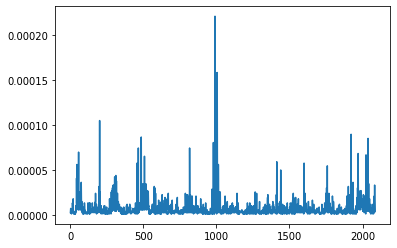

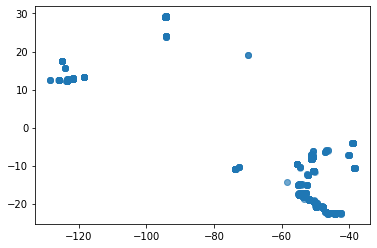

In [0]:
import matplotlib.pyplot as plt
plt.plot(glm.dataset['event_energy'].data)
plt.show()
plt.scatter(glm.dataset['event_lon'].data, glm.dataset['event_lat'].data, 
           cmap='jet',alpha=0.4)
plt.show()

In [0]:
glm.dataset

<xarray.Dataset>
Dimensions:                                 (number_of_events: 2085, number_of_field_of_view_bounds: 2, number_of_flashes: 102, number_of_groups: 1177, number_of_time_bounds: 2, number_of_wavelength_bounds: 2)
Coordinates:
    event_id                                (number_of_events) uint32 143872331 ... 143874537
    event_time_offset                       (number_of_events) datetime64[ns] 2018-02-13T16:10:00.220000 ... 2018-02-13T16:10:19.298000
    event_lat                               (number_of_events) float32 -22.562473 ... -17.293335
    event_lon                               (number_of_events) float32 -46.404686 ... -54.015892
    event_parent_group_id                   (number_of_events) uint32 60159680 ... 60160923
    group_id                                (number_of_groups) uint32 60159680 ... 60160923
    group_time_offset                       (number_of_groups) datetime64[ns] 2018-02-13T16:10:00.220000 ... 2018-02-13T16:10:19.298000
    group_lat                               (number_of_groups) float32 -22.564932 ... -17.217188
    group_lon                               (number_of_groups) float32 -46.34405 ... -54.065018
    group_parent_flash_id                   (number_of_groups) uint16 21630 ... 21786
    flash_id                                (number_of_flashes) uint16 21630 ... 21786
    flash_time_offset_of_first_event        (number_of_flashes) datetime64[ns] 2018-02-13T16:10:00.220000 ... 2018-02-13T16:10:19.204000
    flash_time_offset_of_last_event         (number_of_flashes) datetime64[ns] 2018-02-13T16:10:00.632000 ... 2018-02-13T16:10:19.298000
    flash_lat                               (number_of_flashes) float32 -22.569193 ... -17.219889
    flash_lon                               (number_of_flashes) float32 -46.3687 ... -54.06454
    product_time                            datetime64[ns] 2018-02-13T16:10:00
    lightning_wavelength                    float32 777.37
    group_time_threshold                    float32 0.0
    flash_time_threshold                    float32 3.33
    lat_field_of_view                       float32 0.0
    lon_field_of_view                       float32 -75.0
Dimensions without coordinates: number_of_events, number_of_field_of_view_bounds, number_of_flashes, number_of_groups, number_of_time_bounds, number_of_wavelength_bounds
Data variables:
    event_energy                            (number_of_events) float32 3.05194e-06 ... 4.5779097e-06
    group_area                              (number_of_groups) float32 138.46033 ... 456.44733
    group_energy                            (number_of_groups) float32 7.62985e-06 ... 7.477253e-05
    group_quality_flag                      (number_of_groups) float32 0.0 ... 0.0
    flash_area                              (number_of_flashes) float32 639.02075 ... 456.44733
    flash_energy                            (number_of_flashes) float32 0.000117499694 ... 9.9188044e-05
    flash_quality_flag                      (number_of_flashes) float32 0.0 ... 0.0
    product_time_bounds                     (number_of_time_bounds) datetime64[ns] 2018-02-13T16:10:00 2018-02-13T16:10:20
    lightning_wavelength_bounds             (number_of_wavelength_bounds) float32 776.87 777.87
    lat_field_of_view_bounds                (number_of_field_of_view_bounds) float32 66.56 -66.56
    goes_lat_lon_projection                 int32 -2147483647
    event_count                             float64 2.085e+03
    group_count                             float64 1.177e+03
    flash_count                             float64 102.0
    percent_navigated_L1b_events            float64 1.0
    yaw_flip_flag                           float64 nan
    nominal_satellite_subpoint_lat          float64 0.0
    nominal_satellite_height                float64 3.579e+04
    nominal_satellite_subpoint_lon          float64 -75.0
    lon_field_of_view_bounds                (number_of_field_of_view_bounds) float32 -141.56 -8.44
    percent_uncorrec

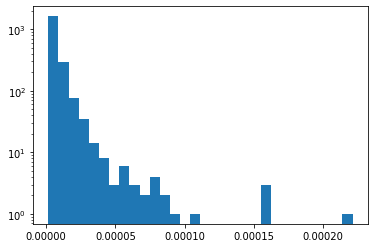

In [0]:
# Histogram of event energies
plt.hist(glm.dataset['event_energy'].data, bins=30)
plt.yscale('log')